## Conjunto de Dados de Reservas Hoteleiras: Análise para Modelagem Preditiva de Cancelamentos

**Contextualização:**

O presente conjunto de dados compreende informações detalhadas sobre reservas efetuadas em dois tipos distintos de estabelecimentos hoteleiros: um hotel urbano e um resort. A relevância deste *dataset* reside na sua capacidade de fornecer *insights* multifacetados acerca do processo de reserva e das características dos hóspedes. Dentre as variáveis registradas, destacam-se a temporalidade da reserva, a duração da estadia, a composição do grupo de hóspedes (adultos, crianças e infantes) e a disponibilidade de infraestrutura como vagas de estacionamento. A ausência de informações pessoalmente identificáveis garante a privacidade dos indivíduos e o foco na análise de padrões agregados.

**Origem e Curadoria:**

Os dados foram originalmente compilados para o estudo acadêmico intitulado "Hotel Booking Demand Datasets", de autoria de Antonio, Almeida e Nunes (2019), publicado na revista *Data in Brief*, Volume 22. Posteriormente, Mock e Bichat realizaram um processo de limpeza e organização dos dados no contexto da iniciativa TidyTuesday (semana de 11 de fevereiro de 2020), conferindo-lhes um formato adequado para análise exploratória e modelagem estatística.

**Conteúdo e Aplicação em Machine Learning:**

A granularidade e a diversidade das informações contidas neste *dataset* o tornam um recurso valioso para a prática da Análise Exploratória de Dados (EDA) e, sobretudo, para o desenvolvimento de modelos preditivos. O objetivo central da utilização destes dados no presente contexto acadêmico consiste na construção de um modelo de *Machine Learning* capaz de **inferir a probabilidade de um cliente cancelar sua reserva hoteleira**. A identificação e a quantificação dos fatores que influenciam a decisão de cancelamento representam um desafio analítico com implicações práticas significativas para a otimização da gestão de receitas e da ocupação hoteleira.

**Referências e Recursos Complementares:**

Para aprofundamento em técnicas de visualização de dados aplicáveis a este tipo de *dataset*, recomenda-se a consulta ao programa TidyTuesday, uma iniciativa online semanal que promove a criação e o compartilhamento de código e visualizações na plataforma Twitter. Adicionalmente, a abordagem metodológica para a construção de modelos preditivos utilizando o pacote *tidymodels* em R, apresentada por Silge, constitui uma referência relevante para a etapa de modelagem.

**Em suma**, este conjunto de dados oferece um substrato empírico robusto para a investigação dos determinantes do cancelamento de reservas hoteleiras através de métodos de *Machine Learning*. A análise sistemática das variáveis disponíveis permitirá a elaboração de um modelo preditivo com potencial para impactar positivamente as estratégias de gestão no setor hoteleiro.

Segue o [Link](https://www.kaggle.com/datasets/qucwang/hotel-bookings-analysis-dataset) para o kaggle com os dados usados nessa analise.

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [4]:
data = pd.read_csv("./hotel_bookings.csv")

In [ ]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data = data.drop(columns=[
    "lead_time",
    "arrival_date_year",
    "arrival_date_month",
    "arrival_date_week_number",
    "arrival_date_week_number",
    "arrival_date_day_of_month",
    "stays_in_weekend_nights",
    "meal",
    "market_segment",
    "distribution_channel",
    "previous_cancellations",
    "previous_cancellations",
    "assigned_room_type",
    "booking_changes",
    "deposit_type",
    "customer_type",
    "required_car_parking_spaces",
    "total_of_special_requests",
    "reservation_status",
    "reservation_status_date",
    "previous_bookings_not_canceled",
    "stays_in_week_nights",
    "company",
    "agent",
    "country"
    ],axis=1)

In [6]:

data['children'] = data['children'].fillna(0).astype(int)

In [ ]:
coluna = "adr"

data[coluna].describe()


,adr
count,119390.000000
mean,101.831122
std,50.535790
min,-6.380000
25%,69.290000
50%,94.575000
75%,126.000000
max,5400.000000


In [ ]:
coluna = "days_in_waiting_list"

valores_unicos = data[coluna].unique()
print(valores_unicos)

[  0  50  47  65 122  75 101 150 125  14  60  34 100  22 121  61  39   5
   1   8 107  43  52   2  11 142 116  13  44  97  83   4 113  18  20 185
  93 109   6  37 105 154  64  99  38  48  33  77  21  80  59  40  58  89
  53  49  69  87  91  57 111  79  98  85  63  15   3  41 224  31  56 187
 176  71  55  96 236 259 207 215 160 120  30  32  27  62  24 108 147 379
  70  35 178 330 223 174 162 391  68 193  10  76  16  28   9 165  17  25
  46   7  84 175 183  23 117  12  54  26  73  45  19  42  72  81  92  74
 167  36]


In [7]:
data.head()

,hotel,is_canceled,adults,children,babies,is_repeated_guest,reserved_room_type,days_in_waiting_list,adr
0,Resort Hotel,0,2,0,0,0,C,0,0.0
1,Resort Hotel,0,2,0,0,0,C,0,0.0
2,Resort Hotel,0,1,0,0,0,A,0,75.0
3,Resort Hotel,0,1,0,0,0,A,0,75.0
4,Resort Hotel,0,2,0,0,0,A,0,98.0


# Normalização

Após a análise inicial do DataFrame, selecionamos apenas as colunas de interesse para as nossas análises — aquelas que indicam valores como o tipo de hotel reservado pelo cliente, número de adultos, crianças e bebês.

No entanto, ainda não estamos totalmente prontos para iniciar a análise. Observamos que algumas colunas precisam ser normalizadas para garantir consistência e facilitar a interpretação dos dados. Abaixo está a categorização adequada para cada uma dessas colunas:


*   Hotel: Categorico Nominal

*   reserved_room_type : Categorico Ordinal
*   days_in_waiting_list: Numerico

*   adr: Numerico




Essa normalização é essencial para aplicarmos corretamente as técnicas de análise e modelagem nos dados.






In [8]:
# Normalizações categoricas:

# Coluna Hotel

coluna = "hotel"
valores_unicos = data[coluna].unique()

data["Resort_hotel"] = data["hotel"].apply(lambda x: 1 if x == "Resort Hotel" else 0)
data["City_Hotel"] = data["hotel"].apply(lambda x: 1 if x == "City Hotel" else 0)
data = data.drop(columns=['hotel'],axis=1)

In [9]:
# coluna reserved_room_type

coluna = "reserved_room_type"
valores_unicos = data[coluna].unique()


reserved_room_type_mapper = {
    "A": 6,
    "B": 5,
    "C": 4,
    "D": 3,
    "E": 2,
    "F": 1,
    "G": 7,
    "H": 8,
    "L": 9,
    "P":10
}

data["reserved_room_type_ordinal"] = data["reserved_room_type"].map(reserved_room_type_mapper)
data = data.drop(columns=['reserved_room_type'],axis=1)

In [10]:
# Normaluzação Numerico:

# coluna days_in_waiting_list

coluna = "days_in_waiting_list"

media = data[coluna].mean()
desvio = data[coluna].std()

data['days_in_waiting_list_pdr'] = data['days_in_waiting_list'].apply(lambda x: (x - media)/desvio)
data = data.drop(columns=['days_in_waiting_list'],axis=1)


In [11]:
# Coluna adr
coluna = "adr"

media = data[coluna].mean()
desvio = data[coluna].std()

data['adr_pdr'] = data['adr'].apply(lambda x: (x - media)/desvio)
data = data.drop(columns=['adr'],axis=1)

In [31]:
data_frenquentes = data.query('is_repeated_guest == 1')

cancelados = data_frenquentes.query('is_canceled == 1')['is_canceled'].count()

porcentagem = (cancelados / len(data_frenquentes)) * 100

print(f"Percentage of cancellations: {porcentagem:.2f}%")

Percentage of cancellations: 14.49%


In [29]:
data_nao_frenquentes = data.query('is_repeated_guest == 0')

cancelados = data_nao_frenquentes.query('is_canceled == 1')['is_canceled'].count()

porcentagem = (cancelados / len(data_nao_frenquentes)) * 100

print(f"Percentage of cancellations: {porcentagem:.2f}%")

Percentage of cancellations: 37.79%


# Visualizações

Agora que estamos com os nossos dados devidamente tratados vamos tentar fazer algumas visualizações graficas para entendermos melhor como os nossos dados se comportam uns com os outros.

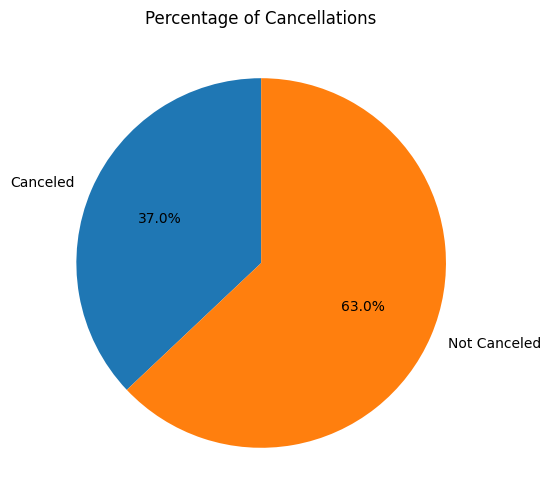

In [19]:

cancelados = data[['is_canceled']].query('is_canceled == 1')['is_canceled'].count()
porcentagem = (cancelados / len(data)) * 100


non_cancellation_percentage = 100 - porcentagem


labels = ['Canceled', 'Not Canceled']
sizes = [porcentagem, non_cancellation_percentage]


plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Cancellations')
plt.show()

**Comentarios:** Como mostra o grafico acima mais de 37% das reservas feitas são canceladas.

<ipython-input-12-8e0a65316a24>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Resort_hotel', y='is_canceled', data=data, ci=None)


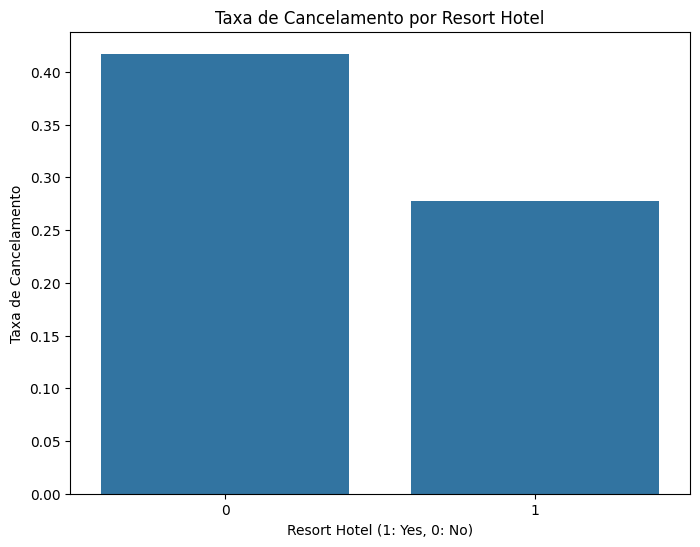

In [12]:
# 1. Taxa de Cancelamento por Tipo de Hotel
plt.figure(figsize=(8, 6))

# Plot for Resort Hotel
sns.barplot(x='Resort_hotel', y='is_canceled', data=data, ci=None)
plt.title('Taxa de Cancelamento por Resort Hotel')
plt.xlabel('Resort Hotel (1: Yes, 0: No)')
plt.ylabel('Taxa de Cancelamento')
plt.show()

Comentários: É notável que o número de cancelamentos de reservas é maior para os hotéis urbanos em comparação aos resorts, provavelmente devido ao custo das diárias e maior concorencia. Isso leva as viagens para resorts a serem mais bem planejadas do que as viagens para centros urbanos.

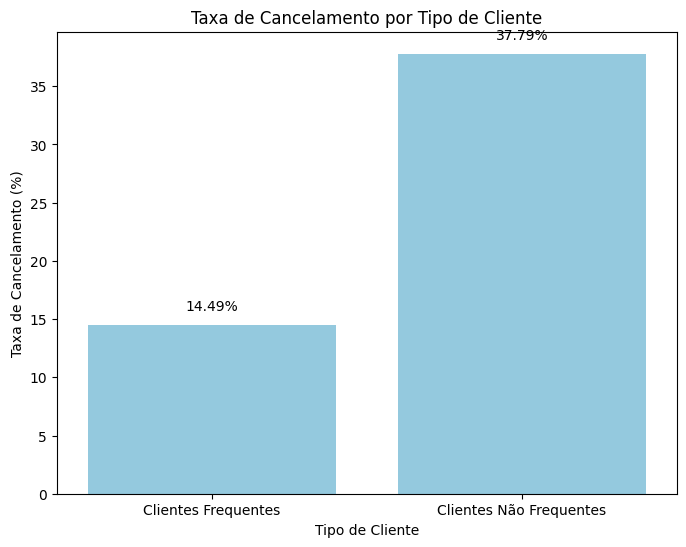

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados para o gráfico
categorias = ['Clientes Frequentes', 'Clientes Não Frequentes']
porcentagens = [14.49,  37.79]  # Substitua pelos valores reais calculados no seu código

# Criando o gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=categorias, y=porcentagens, color='skyblue')
plt.title('Taxa de Cancelamento por Tipo de Cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Taxa de Cancelamento (%)')

# Adicionando os valores das porcentagens acima das barras
for i, v in enumerate(porcentagens):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.show()

**Comentários**: Percebe-se que a porcentagem de cancelamentos de clientes que não são recontes é 23.3% maior que as dos clientes recorrentes.

# Análises com Machine Learning

Agora que conseguimos entender melhor o comportamento dos nossos dados, podemos começar a explorar como resolver um problema de negócio utilizando machine learning. Neste caso, nosso objetivo é encontrar um modelo que consiga prever as chances de um cliente cancelar sua reserva no hotel, o modelo escolido para essa analise foi o de *Arvore de decisão*.

In [46]:
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.33,
    random_state=48)

In [47]:
# Crie uma instância do modelo DecisionTreeClassifier
modelo = DecisionTreeClassifier(random_state=48)  # Você pode ajustar os hiperparâmetros

# Treine o modelo com os dados de treino
modelo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=48)

In [48]:
# Faça previsões com os dados de teste
y_pred = modelo.predict(X_test)

# Avalie o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy}")


Acurácia: 0.7099926394070916
              precision    recall  f1-score   support

           0       0.74      0.82      0.78     24667
           1       0.64      0.52      0.57     14732

    accuracy                           0.71     39399
   macro avg       0.69      0.67      0.68     39399
weighted avg       0.70      0.71      0.70     39399



Como podemos ver utilizando a metrica da acurácia obtivemos um valor de aproximadamente 70.99% de precisão para o nosso modelo utilizado.

Agora vamos criar criar um novo cliente para que o nosso modelo nos fale se ele vai ou nao cancelar a sua reserva.


In [73]:
novo_cliente = data.sample(n=1, replace=False).drop('is_canceled',axis=1)

previsao = modelo.predict(novo_cliente)

if previsao[0] == 0:
  print("O modelo prevê que o cliente NÃO vai cancelar a reserva.")
else:
  print("O modelo prevê que o cliente VAI cancelar a reserva.")

O modelo prevê que o cliente NÃO vai cancelar a reserva.
